# The Cold Foot Investor

This is the companion notebook to this blog post https://medium.com/analytics-vidhya/the-cold-foot-investor-82da6c0baff0 and is an analysis of lending outcomes from an investor standpoint and a simulated conservative investment scenario

This notebook uses Loan data provided by LendingClub.com on their loan returns from 2007 to 2018 including current and past loans. The dataset was obtained form Kaggle.com here https://www.kaggle.com/wendykan/lending-club-loan-data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load LendingClub dataset into pandas dataframe for analysis and view shape and head

In [2]:
df=pd.read_csv('loan.csv')

C:\kosta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(2260668, 145)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Features for id, member_id and url have already been removed to protect anonymity. The columns are empty and can all be dropped

In [5]:
#remove empty columns
df=df.dropna(axis=1,how='all')

Feature 'issue_d' is the month in which the loan was issued and is default to a string type on loading the csv. Change to pandas datetime

In [6]:
df['issue_d']=pd.to_datetime(df['issue_d'])

In [7]:
df.application_type.value_counts(normalize=True)

Individual    0.946604
Joint App     0.053396
Name: application_type, dtype: float64

Only approximately 5% of loans were issued to joint borrowers. For simplicity of later analysis I am going to drop these loans from our data set and eliminate the columns associated with joint borrowers

In [8]:
df=df.loc[df['application_type']=='Individual']
df=df.drop(columns=['application_type'])
df=df.dropna(axis=1,how='all')

More extensive data cleaning and analysis is available in other notebooks in this repository. For this notebook I will analyse only loan returns as described in the blog post linked above

In [9]:
df.loan_status.value_counts(normalize=True)

Fully Paid                                             0.478722
Current                                                0.385949
Charged Off                                            0.119594
Late (31-120 days)                                     0.009213
In Grace Period                                        0.003674
Late (16-30 days)                                      0.001553
Does not meet the credit policy. Status:Fully Paid     0.000929
Does not meet the credit policy. Status:Charged Off    0.000356
Default                                                0.000011
Name: loan_status, dtype: float64

Dataset is reduced to only completed loans with a loan_status of 'Fully Paid' or 'Charged Off' in order to consider only fully realised investment outcomes

In [10]:
df_complete=df.loc[(df['loan_status']=='Fully Paid')|(df['loan_status']=='Charged Off')]

Interest rate and grade are linked loan features and are our best method of characterizing loans

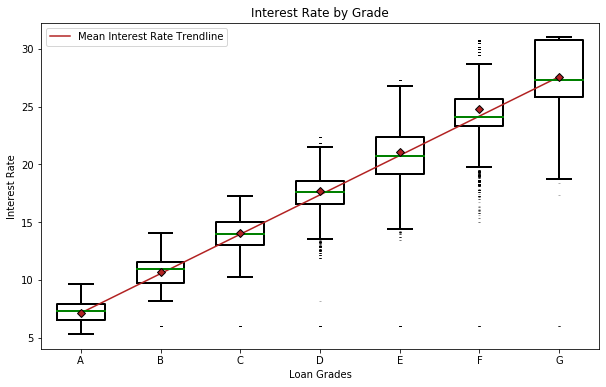

In [11]:
plt.figure(figsize=(10,6))
plt.boxplot([df_complete.loc[df_complete['grade']=='A']['int_rate'],
             df_complete.loc[df_complete['grade']=='B']['int_rate'],
             df_complete.loc[df_complete['grade']=='C']['int_rate'],
             df_complete.loc[df_complete['grade']=='D']['int_rate'],
             df_complete.loc[df_complete['grade']=='E']['int_rate'],
             df_complete.loc[df_complete['grade']=='F']['int_rate'],
             df_complete.loc[df_complete['grade']=='G']['int_rate']],
             showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'),
            flierprops=dict(markersize=2,marker='_',alpha=0.3),
            boxprops=dict(linewidth=2),
            medianprops=dict(linewidth=2,color='g'),
            whiskerprops=dict(linewidth=2,),
            capprops=dict(linewidth=2,),
            widths=0.6)

plt.plot([1,7],[df_complete.loc[df_complete['grade']=='A']['int_rate'].mean(),df_complete.loc[df_complete['grade']=='G']['int_rate'].mean()],label='Mean Interest Rate Trendline',color='firebrick')
plt.xticks([1,2,3,4,5,6,7],['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Interest Rate by Grade')
plt.xlabel('Loan Grades')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()  

Actual investment outcomes of all completed loans. Strong median returnsbut also some investor losses.

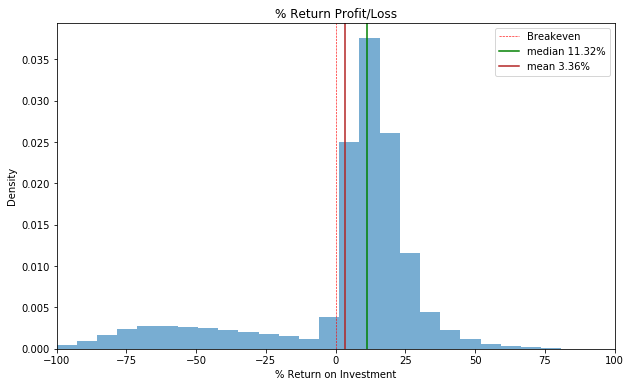

In [12]:
plt.figure(figsize=(10,6))
plt.hist(((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt']))*100,alpha=0.6,bins=30,density=True)
plt.axvline(0,color='red',linewidth=0.6,label='Breakeven',linestyle='--')
plt.axvline(((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt'])).median()*100,color='g',label='median '+str(round(((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt'])).median()*100,2))+'%')
plt.axvline(((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt'])).mean()*100,color='firebrick',label='mean '+str(round(((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt'])).mean()*100,2))+'%')
plt.xlim([-100,100])
plt.legend()
plt.xlabel('% Return on Investment')
plt.ylabel('Density')
plt.title('% Return Profit/Loss')
plt.show()

Comparison of loan expectation to realized outcomes 

Expected Total Payment based on loan amount, length and interest rate formula -most direct measure from an investor standpoint

<img src = 'loanfm3.png'>


convert term from string to integer

In [13]:
df_complete['term']=df_complete['term'].str.strip().map({'36 months':36,'60 months':60})

C:\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
r=df_complete['int_rate']/(12*100)
n=df_complete['term']
p=df_complete['loan_amnt']


In [15]:
df_complete['expected_total_pymnt']=(r*p*n)/(1-((1+r)**(-n)))

C:\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Split dataset into 36 and 60 month terms for visualization

In [16]:
df_complete36=df_complete.loc[df_complete['term']==36]
df_complete60=df_complete.loc[df_complete['term']==60]

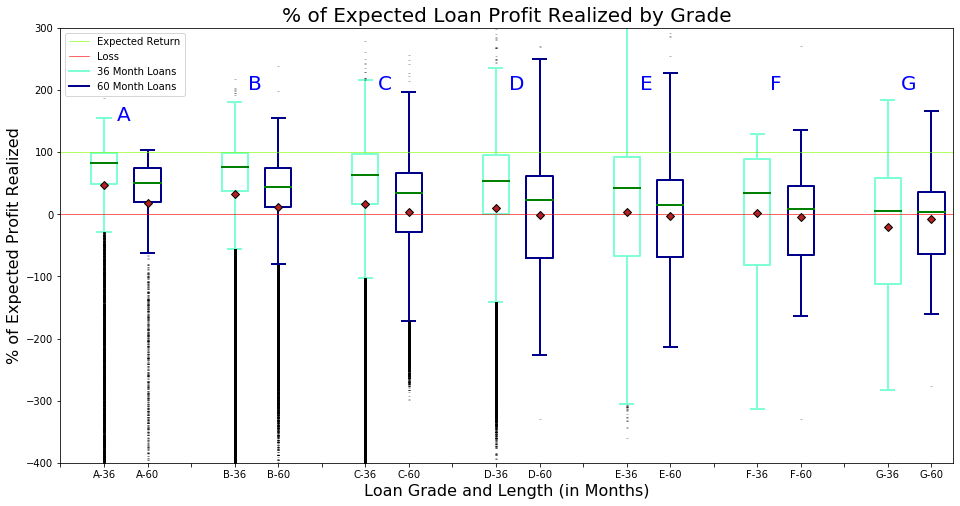

In [17]:
#Difference between actual and epxected payment for 36 and 60 month loans by grade-ALL
plt.figure(figsize=(16,8))
plt.boxplot([(df_complete36.loc[df_complete36['grade']=='A']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='A']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='A']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='A']['loan_amnt']),
            (df_complete36.loc[df_complete36['grade']=='B']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='B']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='B']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='B']['loan_amnt']),
            (df_complete36.loc[df_complete36['grade']=='C']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='C']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='C']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='C']['loan_amnt']),
            (df_complete36.loc[df_complete36['grade']=='D']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='D']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='D']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='D']['loan_amnt']),
            (df_complete36.loc[df_complete36['grade']=='E']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='E']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='E']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='E']['loan_amnt']),
            (df_complete36.loc[df_complete36['grade']=='F']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='F']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='F']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='F']['loan_amnt']),
            (df_complete36.loc[df_complete36['grade']=='G']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='G']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='G']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='G']['loan_amnt'])],
            showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'),
            flierprops=dict(markersize=2,marker='_',alpha=0.3),
            boxprops=dict(linewidth=2,color='aquamarine'),
            medianprops=dict(linewidth=2,color='g'),
            whiskerprops=dict(linewidth=2,color='aquamarine'),
            capprops=dict(linewidth=2,color='aquamarine'),
            positions=[1,4,7,10,13,16,19],
            widths=0.6,
           )

plt.boxplot([(df_complete60.loc[df_complete60['grade']=='A']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='A']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='A']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='A']['loan_amnt']),
            (df_complete60.loc[df_complete60['grade']=='B']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='B']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='B']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='B']['loan_amnt']),
            (df_complete60.loc[df_complete60['grade']=='C']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='C']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='C']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='C']['loan_amnt']),
            (df_complete60.loc[df_complete60['grade']=='D']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='D']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='D']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='D']['loan_amnt']),
            (df_complete60.loc[df_complete60['grade']=='E']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='E']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='E']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='E']['loan_amnt']),
            (df_complete60.loc[df_complete60['grade']=='F']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='F']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='F']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='F']['loan_amnt']),
            (df_complete60.loc[df_complete60['grade']=='G']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='G']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='G']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='G']['loan_amnt'])],
            showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'),
            flierprops=dict(markersize=2,marker='_',alpha=0.3),
            boxprops=dict(linewidth=2,color='darkblue'),
            medianprops=dict(linewidth=2,color='g'),
            whiskerprops=dict(linewidth=2,color='darkblue'),
            capprops=dict(linewidth=2,color='darkblue'),
            positions=[2,5,8,11,14,17,20],
            widths=0.6,
           )
plt.xticks(np.arange(0,21),["",'A-36','A-60','', 'B-36','B-60','', 'C-36','C-60','', 'D-36','D-60','', 'E-36','E-60','', 'F-36','F-60','', 'G-36','G-60',''])
plt.axhline(100,color='chartreuse',linewidth=0.6,label='Expected Return')
plt.axhline(0,color='red',linewidth=0.6,label='Loss')
plt.axhline(301,color='aquamarine',linewidth=2,label='36 Month Loans') #off chart for legend only
plt.axhline(301,color='darkblue',linewidth=2,label='60 Month Loans') #off chart for legend only
plt.legend(loc ='upper left')
plt.title('% of Expected Loan Profit Realized by Grade',size=20)
plt.xlabel('Loan Grade and Length (in Months)',size=16)
plt.ylabel('% of Expected Profit Realized',size=16)
plt.ylim([-400,300])
plt.text(1.3,150,'A',fontdict=dict(size=20,color='blue'))
plt.text(4.3,200,'B',fontdict=dict(size=20,color='blue'))
plt.text(7.3,200,'C',fontdict=dict(size=20,color='blue'))
plt.text(10.3,200,'D',fontdict=dict(size=20,color='blue'))
plt.text(13.3,200,'E',fontdict=dict(size=20,color='blue'))
plt.text(16.3,200,'F',fontdict=dict(size=20,color='blue'))
plt.text(19.3,200,'G',fontdict=dict(size=20,color='blue'))
plt.show()

Reality does not match up to loan expectation in simple terms of expected repayment plan

Visualize actual loan returns to have a realistic gauge of investor outcomes

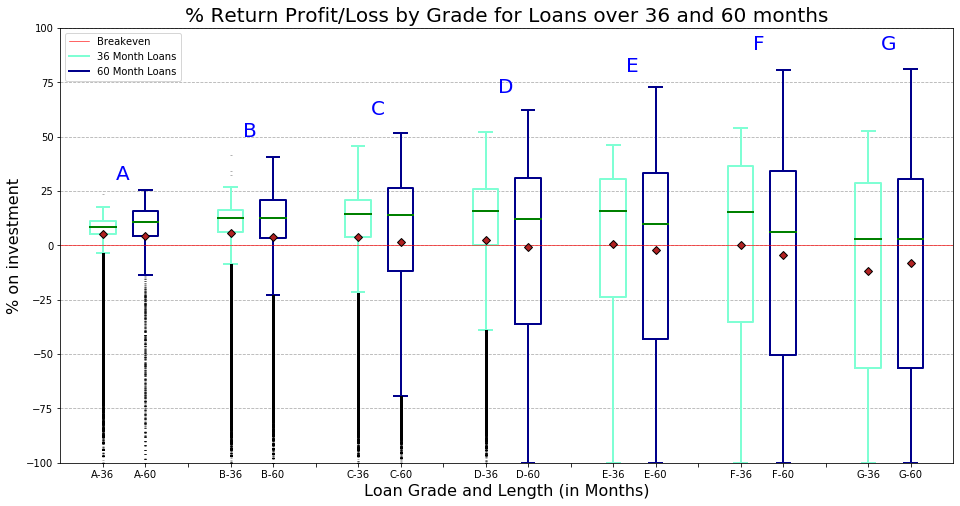

In [18]:
#actual loss or profit by grade as a % of loan amount for 36 month loans
plt.figure(figsize=(16,8))
plt.boxplot([(df_complete36.loc[df_complete36['grade']=='A']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='A']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='A']['loan_amnt'],
            (df_complete36.loc[df_complete36['grade']=='B']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='B']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='B']['loan_amnt'],
            (df_complete36.loc[df_complete36['grade']=='C']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='C']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='C']['loan_amnt'],
            (df_complete36.loc[df_complete36['grade']=='D']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='D']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='D']['loan_amnt'],
            (df_complete36.loc[df_complete36['grade']=='E']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='E']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='E']['loan_amnt'],
            (df_complete36.loc[df_complete36['grade']=='F']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='F']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='F']['loan_amnt'],
            (df_complete36.loc[df_complete36['grade']=='G']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='G']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='G']['loan_amnt']],
            showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'),
            flierprops=dict(markersize=2,marker='_',alpha=0.3),
            boxprops=dict(linewidth=2,color='aquamarine'),
            medianprops=dict(linewidth=2,color='g'),
            whiskerprops=dict(linewidth=2,color='aquamarine'),
            capprops=dict(linewidth=2,color='aquamarine'),
            positions=[1,4,7,10,13,16,19],
            widths=0.6,
           )

plt.boxplot([(df_complete60.loc[df_complete60['grade']=='A']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='A']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='A']['loan_amnt'],
            (df_complete60.loc[df_complete60['grade']=='B']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='B']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='B']['loan_amnt'],
            (df_complete60.loc[df_complete60['grade']=='C']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='C']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='C']['loan_amnt'],
            (df_complete60.loc[df_complete60['grade']=='D']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='D']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='D']['loan_amnt'],
            (df_complete60.loc[df_complete60['grade']=='E']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='E']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='E']['loan_amnt'],
            (df_complete60.loc[df_complete60['grade']=='F']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='F']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='F']['loan_amnt'],
            (df_complete60.loc[df_complete60['grade']=='G']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='G']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='G']['loan_amnt']],
            showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'),
            flierprops=dict(markersize=2,marker='_',alpha=0.3),
            boxprops=dict(linewidth=2,color='darkblue'),
            medianprops=dict(linewidth=2,color='g'),
            whiskerprops=dict(linewidth=2,color='darkblue'),
            capprops=dict(linewidth=2,color='darkblue'),
            positions=[2,5,8,11,14,17,20],
            widths=0.6,
           )
plt.xticks(np.arange(1,21),['A-36','A-60','', 'B-36','B-60','', 'C-36','C-60','', 'D-36','D-60','', 'E-36','E-60','', 'F-36','F-60','', 'G-36','G-60',''])
plt.axhline(0,color='red',linewidth=0.6,label='Breakeven')
plt.title('% Return Profit/Loss by Grade for Loans over 36 and 60 months',size=20)
plt.ylim([-100,100])
plt.ylabel('% on investment',size='16')
plt.xlabel('Loan Grade and Length (in Months)',size=16)
plt.axhline(101,color='aquamarine',linewidth=2,label='36 Month Loans') #off chart for legend only
plt.axhline(101,color='darkblue',linewidth=2,label='60 Month Loans') #off chart for legend only
# plt.fill_between([-1,22], 4, y2=7,color='y',label='Lending Club promoted return',alpha=0.3) - incorrect
plt.xlim([0,21])
plt.legend(loc ='upper left')
plt.text(1.3,30,'A',fontdict=dict(size=20,color='blue') )
plt.text(4.3,50,'B',fontdict=dict(size=20,color='blue'))
plt.text(7.3,60,'C',fontdict=dict(size=20,color='blue'))
plt.text(10.3,70,'D',fontdict=dict(size=20,color='blue'))
plt.text(13.3,80,'E',fontdict=dict(size=20,color='blue'))
plt.text(16.3,90,'F',fontdict=dict(size=20,color='blue'))
plt.text(19.3,90,'G',fontdict=dict(size=20,color='blue'))
plt.grid(which='major',axis='y',linestyle='--')
plt.show()

Average returns on highest rated loan grades:

In [19]:
((df_complete36.loc[df_complete36['grade']=='A']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='A']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='A']['loan_amnt']).mean()

5.295169509611857

In [20]:
((df_complete36.loc[df_complete36['grade']=='B']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='B']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='B']['loan_amnt']).mean()

5.5794378420830375

Conservative Investor Simulation - take 1000 loans from 2013(should be settled by now) with grade A or B and term 36 months and find return on loan % - sum (1 dollar in each loan)

In [30]:
df['term']=df['term'].str.strip().map({'36 months':36,'60 months':60})
df.loc[(df['issue_d']>'2013')&(df['issue_d']<'2014')].loc[(df['grade']=='A')|(df['grade']=='B')].loc[df['term']==36][['loan_amnt','total_pymnt']].shape

(54107, 2)

54,107 loans to choose from 

one simulation of investment

In [31]:
df_sim=df.loc[(df['issue_d']>'2013')&(df['issue_d']<'2014')].loc[(df['grade']=='A')|(df['grade']=='B')].loc[df['term']==36][['loan_amnt','total_pymnt']].sample(n=1000,random_state=44)
((df_sim['total_pymnt'])/df_sim['loan_amnt']).sum()

1104.7599720952683

Return of \\$104.76 on investment of $1000
10.5% return on investment!

Investment summary statistics

In [32]:
pd.Series((df_sim['total_pymnt']-df_sim['loan_amnt'])/df_sim['loan_amnt']).describe()

count    1000.000000
mean        0.104760
std         0.157201
min        -0.921790
25%         0.095117
50%         0.141073
75%         0.180978
max         0.233415
dtype: float64

Monte Carlo Simulation - 1000 versions of 1000 randomly selected loans

In [40]:
def sim_invest(df,n,m):
    """conservative investment simulator for m loans graded A or B and 36 month term
    
    df = loan dataframe with columns ['issue_d','grade','term',loan_amnt','total_pymnt']
    n = number of investment simulations to run
    m = number of loans included in each simulation"""
    
    df=df.loc[(df['issue_d']>'2013')&(df['issue_d']<'2014')].loc[(df['grade']=='A')|(df['grade']=='B')].loc[df['term']==36][['loan_amnt','total_pymnt']]
    profit=[]
    i=0
    while i<n:
        df_temp=df.sample(n=m,random_state=i)
        profit.append(((df_temp['total_pymnt']-df_temp['loan_amnt'])/df_temp['loan_amnt']).sum()/n*100)
        i+=1
    return profit

In [41]:
sim_inv=sim_invest(df,1000,1000)

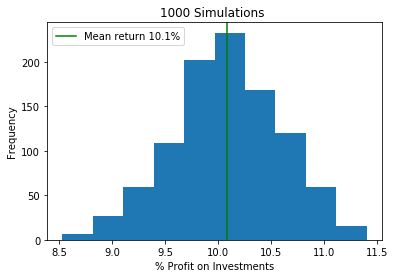

In [42]:
plt.hist(sim_inv)
plt.axvline(np.mean(sim_inv),color='g',label='Mean return '+str(round(np.mean(sim_inv),1))+'%')
plt.ylabel('Frequency')
plt.xlabel('% Profit on Investments')
plt.title('1000 Simulations ')
plt.legend()
plt.show()

Average result of 1000 simulations of 1000 investments has return of \\$101 on investment of \\$1000
10.1% profit
Regression to the mean in effect!

Monte Carlo Simulation summary statistics

In [36]:
pd.Series(sim_inv).describe()

count    1000.000000
mean       10.087260
std         0.506335
min         8.533278
25%         9.752511
50%        10.099819
75%        10.426721
max        11.404831
dtype: float64

My investment scenarios return a range of 8.5% to 11.4% return approximately normally distributed around a mean of 10.1%. It is important to note that this is not an annual return but a return over the course of the loan which in the above scenarios is 36 months. However, LendingClub do not make you wait that long and pay returns on notes purchased by investors on a monthly basis.